## Sentiment Anylisis Model Gift Cards
### COMP262 - Group 5
### Ruben Ormeno
### Mariela
### Samantha
### Juan
### Jose Muniz


### 1. Dataset data exploration

In [7]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
import json
import pandas as pd
df = pd.read_json(r'Gift_Cards_5.json',lines = True)

# Field Description
### overall (bigint) – User rating (1-5)
### verified (boolean)  Is the review verified (true, false)
### reviewtime (string) – Timestamp formatted like “10 30, 2009”
### reviewerid (string) – Amazon generated user id
### asin (string) – Unique Amazon generated product id
### reviewername (string) – User supplied name
### reviewtext (string) – Review text
### summary (string) – Summary of Review text
### unixreviewtime (bigint) – Timestamp formatted in epoch time.
### vote (double) – Userful voters form other users
### image -  images that users post after they have received the product

In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [10]:
df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


In [11]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN


## 1a. Counts, averages

In [12]:
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]  # Columns with missing values
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)  # Number of missing values, sorted
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)  # Percentage of missing values, sorted
    missing_df = pd.concat([n_miss, np.around(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio (%)'])  # Concatenate counts and percentages
    return missing_df
def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82,'~'))
    print(df.dtypes)
    print("MISSING VALUES ANALYSIS".center(82, '~'))
    print(missing_values_analysis(df))
    print("FREQUENCY ANALYSIS".center(82, '~'))
    print(f"Frequency for {'overall'}:".center(82, '-'))
    print(df['overall'].value_counts().head())
    print("\n")
    print("QUANTILES".center(82, '~'))
    try:
        # Calculate quantiles for numeric columns only
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        print(df[numeric_cols].quantile([0, 0.50, 0.75, 1]).T)
    except Exception as e:
        print(f"Error calculating quantiles: {e}")
    if head > 0:
        print("FIRST {} ROWS".format(head).center(82, '~'))
        print(df.head(head))
    if tail > 0:
        print("LAST {} ROWS".format(tail).center(82, '~'))
        print(df.tail(tail))

# You can now call check_dataframe(df) again with this adjusted function.
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 2972
Columns: 12
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
overall             int64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote              float64
image              object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MISSING VALUES ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            Missing Values  Ratio (%)
image                 2960      99.60
vote                  2764      93.00
style                 2108      70.93
reviewText               6       0.20
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FREQUENCY ANALYSIS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------Frequency for overall:------------------------------
overall
5    2752
4     154
3      33
1      2

In [13]:
# classes by variable

import pandas as pd

def check_class(dataframe):
    unique_counts = []
    for column in dataframe.columns:
        try:
            # Attempt to count unique values in the usual way
            unique_count = dataframe[column].nunique()
        except TypeError:
            # Handle unhashable items by converting them to strings (or another approach as needed)
            unique_count = dataframe[column].astype(str).nunique()
        unique_counts.append(unique_count)

    # Create DataFrame with counts
    nunique_df = pd.DataFrame({'Variable': dataframe.columns, 'Classes': unique_counts})
    nunique_df = nunique_df.sort_values('Classes', ascending=False).reset_index(drop=True)
    return nunique_df
check_class(df)

,Variable,Classes
0,reviewText,1937
1,summary,952
2,reviewTime,797
3,unixReviewTime,797
4,reviewerID,458
5,reviewerName,429
6,asin,148
7,vote,20
8,style,18
9,image,13


## 1b. Distribution of number of reviews across products

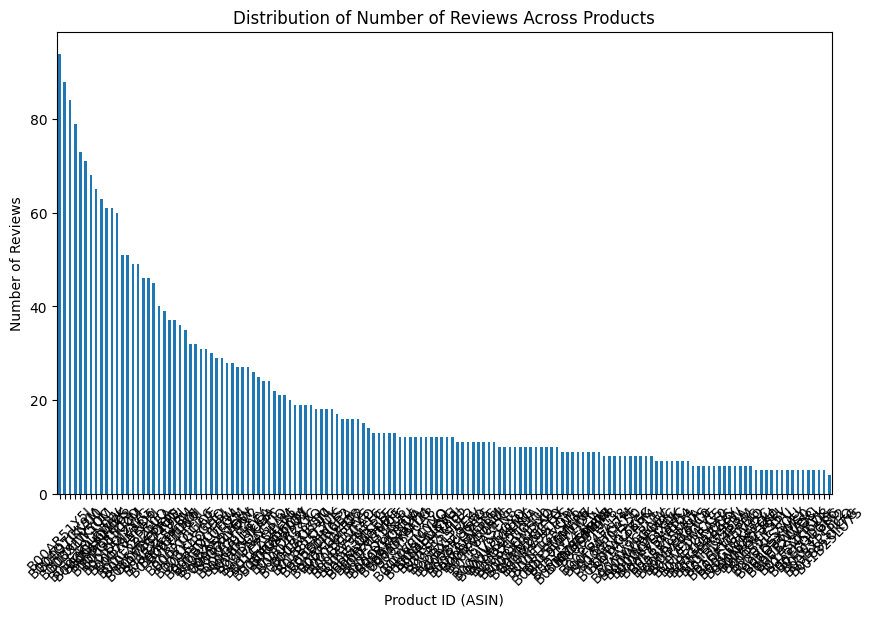

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar')
plt.title('Distribution of Number of Reviews Across Products')
plt.xlabel('Product ID (ASIN)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

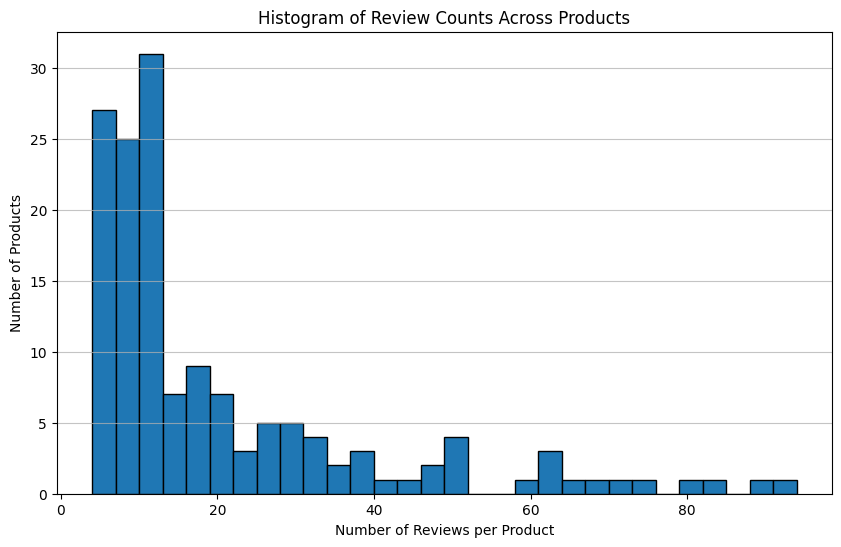

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of reviews per product (ASIN)
review_counts = df['asin'].value_counts()

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(review_counts, bins=30, edgecolor='black')
plt.title('Histogram of Review Counts Across Products')
plt.xlabel('Number of Reviews per Product')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


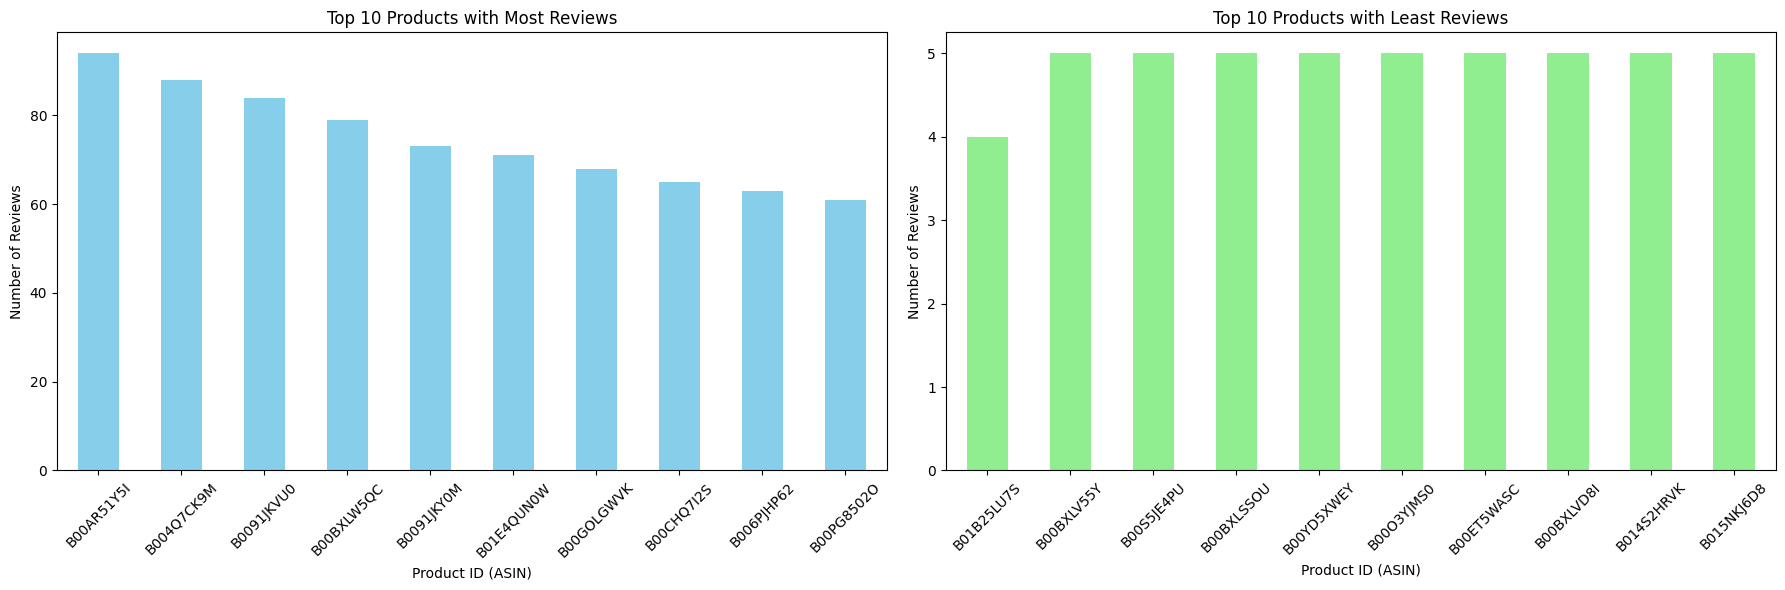

In [16]:
# Calculate the top 10 products with the most reviews
top_reviewed_asins = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews
least_reviewed_asins = df['asin'].value_counts().nsmallest(10)

# Plotting both top and least reviewed products side by side for comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top reviewed ASINs plot
top_reviewed_asins.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Products with Most Reviews')
axes[0].set_xlabel('Product ID (ASIN)')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Least reviewed ASINs plot
least_reviewed_asins.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Products with Least Reviews')
axes[1].set_xlabel('Product ID (ASIN)')
axes[1].set_ylabel('Number of Reviews')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 1c. Distribution of number of reviews per products

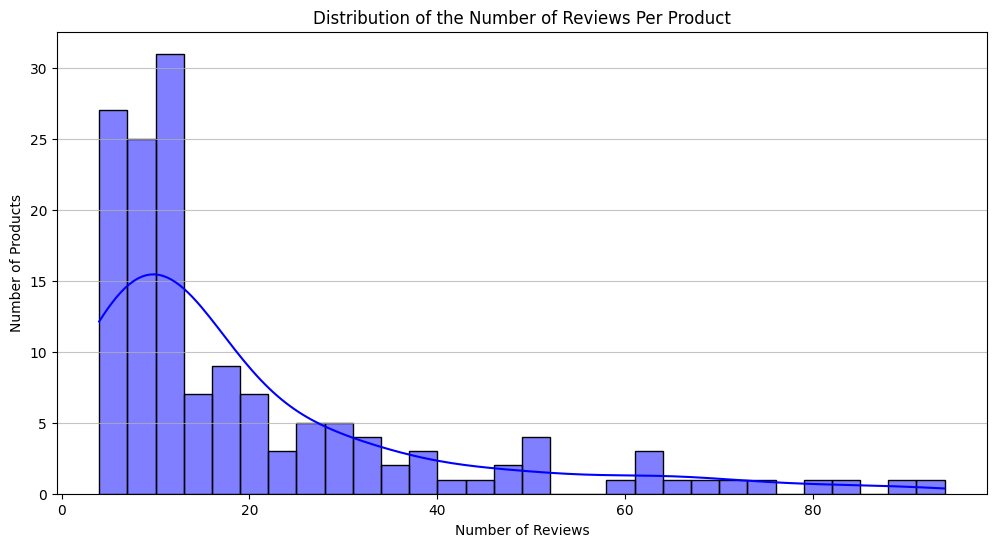

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

reviews_per_product = df['asin'].value_counts()

# plot using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_product, bins=30, kde=True, color='blue')
plt.title('Distribution of the Number of Reviews Per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

plt.show()


/var/folders/96/cd419rln3n94khm6g8s_plyr0000gn/T/ipykernel_85787/2365832165.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_reviews.values, y=top_10_most_reviews.index, ax=axes[0], palette="Blues_d")
/var/folders/96/cd419rln3n94khm6g8s_plyr0000gn/T/ipykernel_85787/2365832165.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_least_reviews.values, y=top_10_least_reviews.index, ax=axes[1], palette="Greens_d")


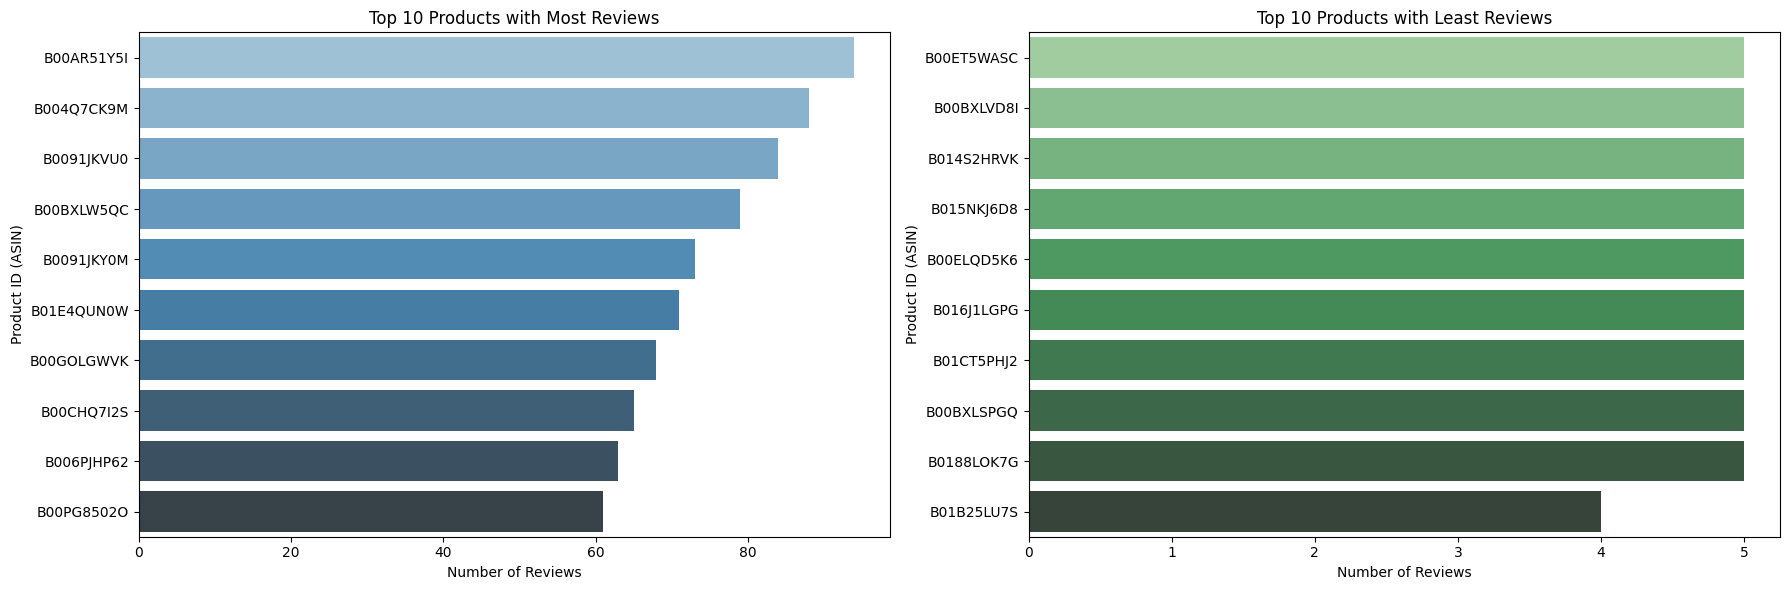

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset information

# Calculate the top 10 products with the most reviews and their counts
top_10_most_reviews = df['asin'].value_counts().head(10)

# Calculate the top 10 products with the least reviews and their counts
top_10_least_reviews = df['asin'].value_counts().tail(10)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 products with most reviews
sns.barplot(x=top_10_most_reviews.values, y=top_10_most_reviews.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Products with Most Reviews')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Product ID (ASIN)')

# Plot for top 10 products with least reviews
sns.barplot(x=top_10_least_reviews.values, y=top_10_least_reviews.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Products with Least Reviews')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Product ID (ASIN)')

plt.tight_layout()
plt.show()


# 1d. Distribution reviews per user

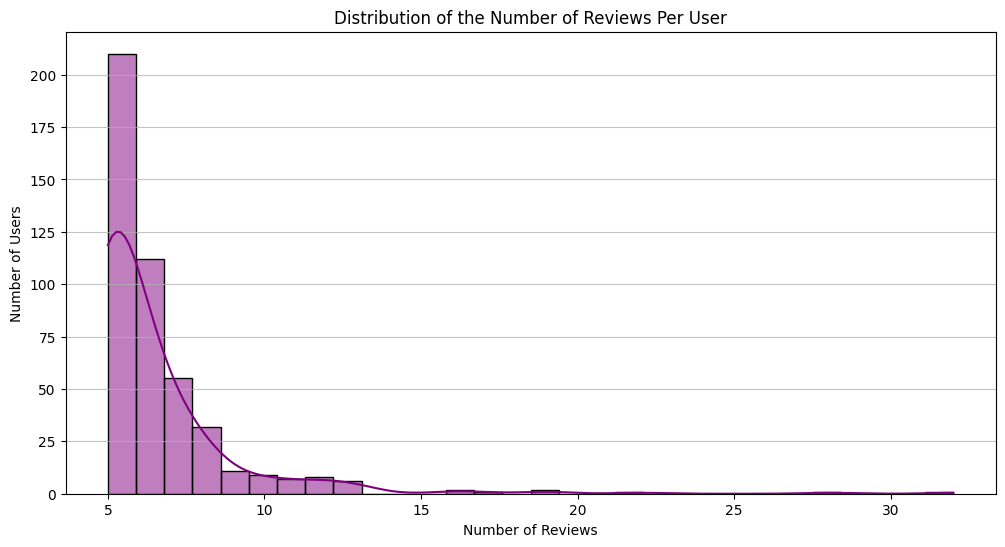

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the number of reviews per user
reviews_per_user = df['reviewerID'].value_counts()

# Plot the distribution of the number of reviews per user using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(reviews_per_user, bins=30, kde=True, color='purple')
plt.title('Distribution of the Number of Reviews Per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)

plt.show()

/var/folders/96/cd419rln3n94khm6g8s_plyr0000gn/T/ipykernel_85787/2009657544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_30_users_reviews.index, x=top_30_users_reviews.values, palette='coolwarm')


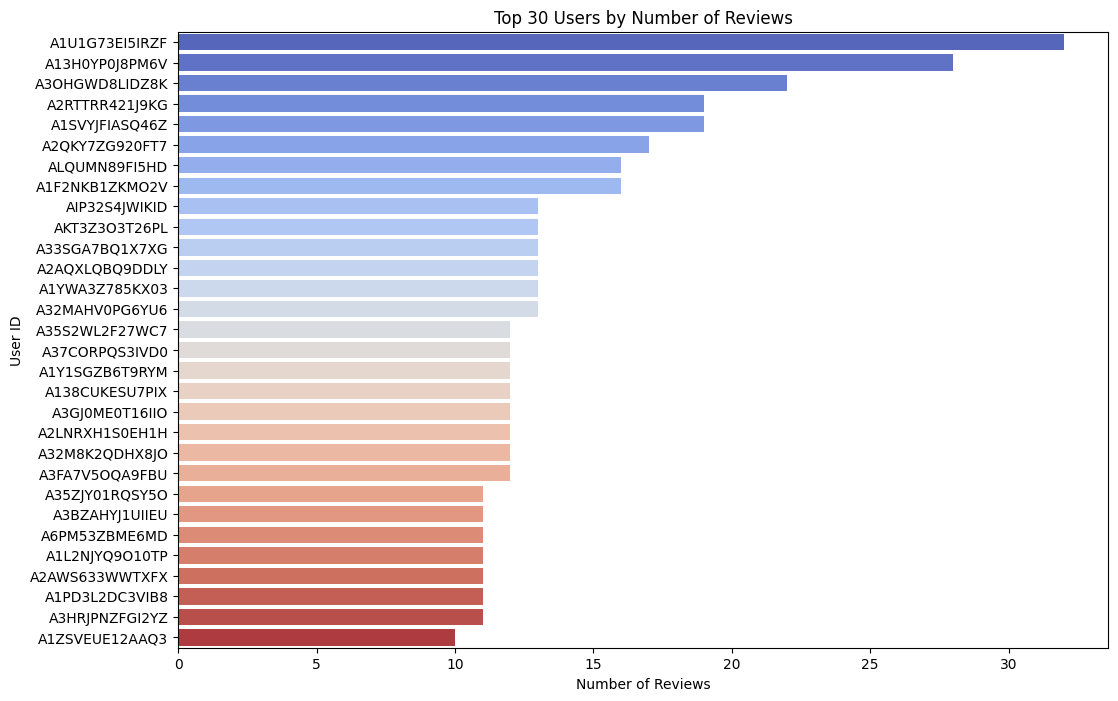

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 users with the most reviews and their counts
top_30_users_reviews = df['reviewerID'].value_counts().head(30)

# Plotting the distribution of reviews for the top 30 users
plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_users_reviews.index, x=top_30_users_reviews.values, palette='coolwarm')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')

plt.show()

/var/folders/96/cd419rln3n94khm6g8s_plyr0000gn/T/ipykernel_85787/2966696706.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_combined.values, y=top_30_combined.index, palette='rocket')


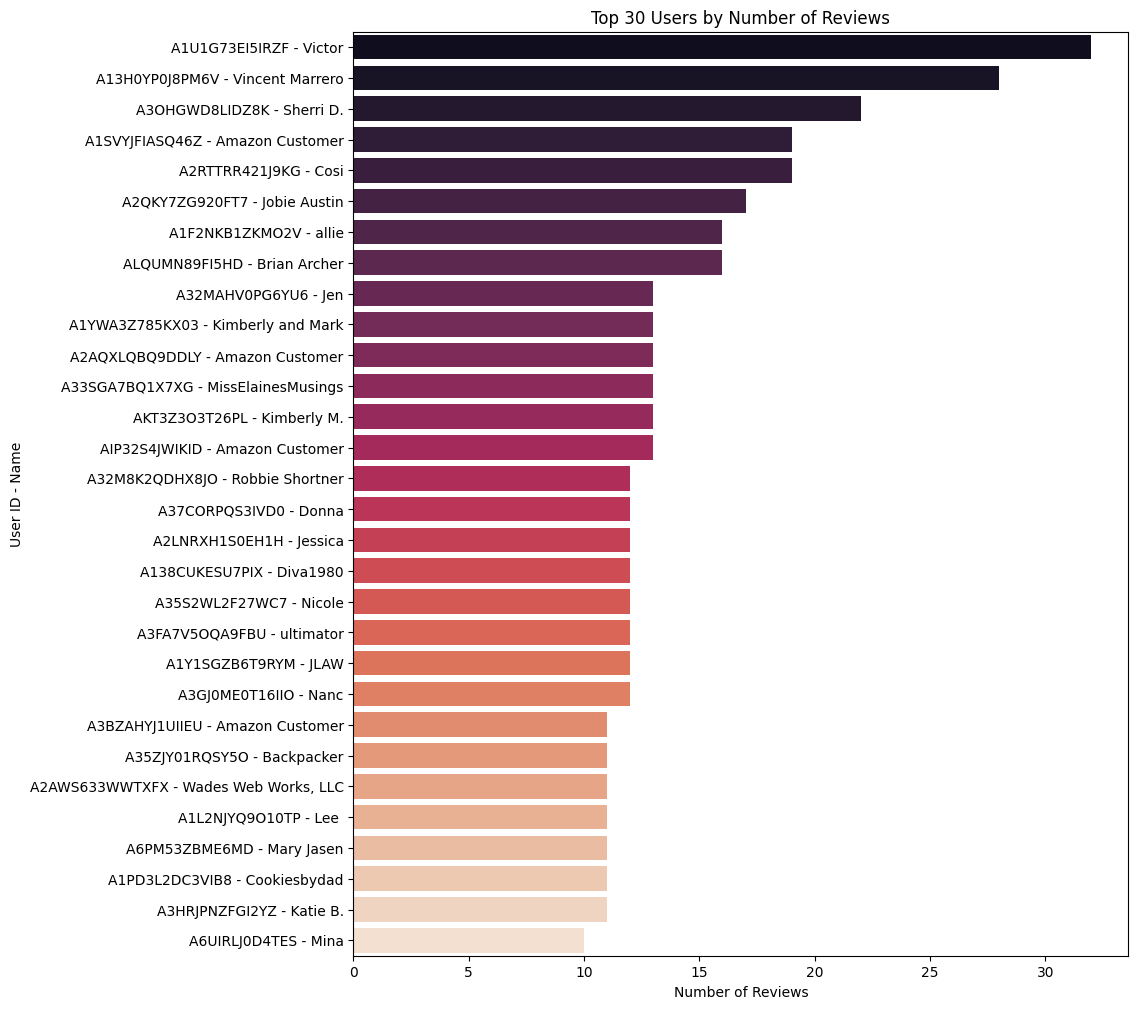

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that combines 'reviewerID' and 'reviewerName'
df['ID_Name'] = df['reviewerID'] + ' - ' + df['reviewerName']

top_30_combined = df['ID_Name'].value_counts().head(30)

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(x=top_30_combined.values, y=top_30_combined.index, palette='rocket')
plt.title('Top 30 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID - Name')

plt.show()


## 2.	Text basic pre-processing:

In [22]:
# a. Labeling the data based on ratings
def label_rating(row):
    if row['overall'] >= 4:
        return 'Positive'
    elif row['overall'] == 3:
        return 'Neutral'
    else:  # Ratings 1 and 2
        return 'Negative'

df['rating_label'] = df.apply(label_rating, axis=1)

In [23]:
# b.	Chose the appropriate columns for your sentiment analyzer

df['reviewText'] = df['reviewText'].fillna('')
df['summary'] = df['summary'].fillna('')

# Combine 'reviewText' and 'summary' into a single column for a comprehensive sentiment analysis
df['combined_text'] = df['reviewText'] + " " + df['summary']

# Print the shape of the DataFrame to see the number of entries and columns
print("DataFrame shape:", df.shape)

# Print the first few rows of the new combined_text column to verify the concatenation
print("\nSample combined text from the first few reviews:")
print(df['combined_text'].head())

# Print a summary of any missing values in the combined_text column
print("\nMissing values in 'combined_text':", df['combined_text'].isnull().sum())

# For text, you might want to look at the distribution of text lengths
print("\nSummary of text lengths in 'combined_text':")
print(df['combined_text'].apply(len).describe())


DataFrame shape: (2972, 15)

Sample combined text from the first few reviews:
0                       Another great gift. Five Stars
1                Gift card for my daughter Ease of use
2                              Nice present Five Stars
3    My niece loved this birthday greeting/gift car...
4                           fine as a gift. Five Stars
Name: combined_text, dtype: object

Missing values in 'combined_text': 0

Summary of text lengths in 'combined_text':
count    2972.000000
mean       83.818641
std       137.925703
min         5.000000
25%        23.000000
50%        40.000000
75%        87.000000
max      2477.000000
Name: combined_text, dtype: float64


In [24]:
# c. Check for outliers in 'reviewText' by word count
df['word_count'] = df['reviewText'].fillna('').apply(lambda x: len(x.split()))
print(df['word_count'].describe())

count    2972.000000
mean       12.792396
std        24.730094
min         0.000000
25%         2.000000
50%         5.000000
75%        14.000000
max       461.000000
Name: word_count, dtype: float64


In [52]:
#show the number of words per review in descending order

df['word_count'].value_counts().sort_index(ascending=False)

word_count
461      1
427      1
381      1
252      1
223      1
      ... 
4      286
3      226
2      404
1      413
0        6
Name: count, Length: 122, dtype: int64

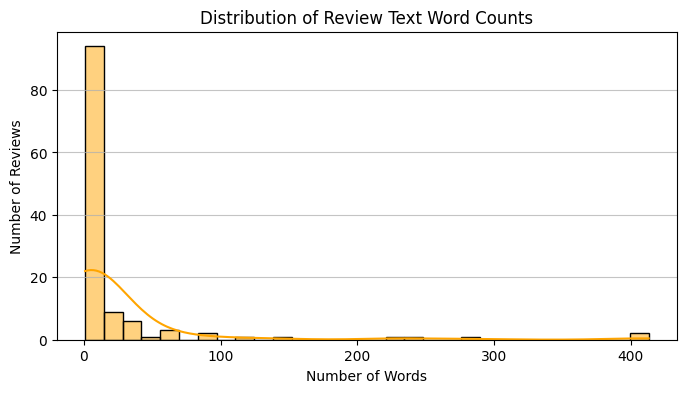

In [53]:
#plotting the distribution of word counts
plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'].value_counts(), bins=30, kde=True, color='orange')
plt.title('Distribution of Review Text Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.75)

plt.show()

/var/folders/96/cd419rln3n94khm6g8s_plyr0000gn/T/ipykernel_85787/3289278643.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


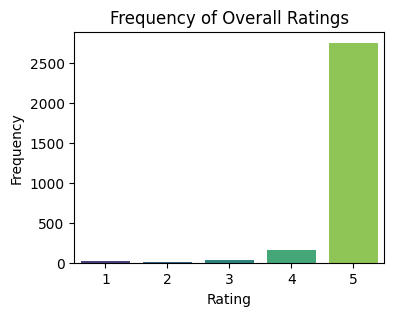

In [26]:
#showing the frequency of overall ratings and rating labels
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each rating
rating_counts = df['overall'].value_counts()

# Plot the frequency of each rating using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Frequency of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()


/var/folders/96/cd419rln3n94khm6g8s_plyr0000gn/T/ipykernel_85787/3763732787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')


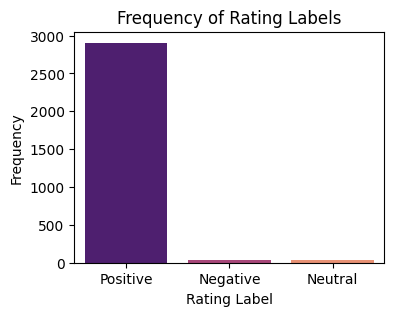

In [27]:
# Count the frequency of each rating label
label_counts = df['rating_label'].value_counts()

# Plot the frequency of each rating label using seaborn
plt.figure(figsize=(4, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')
plt.title('Frequency of Rating Labels')
plt.xlabel('Rating Label')
plt.ylabel('Frequency')

plt.show()
